<a href="https://colab.research.google.com/github/joebathelt/AUC_CogPsy/blob/main/week2_muller_lyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Müller-Lyer Illusion
This experiment serves two purposes. First, it introduces a well-known perceptual illusion called the Müller-Lyer illusion (named after Franz Carl Müller-Lyer, who published a paper on the topic in 1889). Second, it demonstrates a psychophysical experimental method called the method of constant stimuli.
The Müller-Lyer illusion is easily demonstrated. In the figure below, there are three horizontal lines. Two of the lines contain a pair of "wings." The wings are drawn outward or inward from the end of the line. The illusion is that the line with the outward-drawn wings tends to look longer than the line with the inward-drawn wings. The line without wings tends to look smaller than the line with outward-drawn wings and bigger than the line with inward-drawn wings. It is an illusion because the lines are actually all the same length, which you can verify with a ruler.

![Müller-Lyer Illusion](https://drive.google.com/uc?export=view&id=1aiysN3eT479c6RxxneKYjofrYWVwgMAv)

It is fun to look at visual illusions and realize how our perception differs from reality. To guide the development of theories on cognition and perception, however, we need more-specific data. We need to know, for example, just how long does the line with the wings drawn outward look? The more general question is: "How do we measure characteristics of a percept?" We cannot measure them directly because perception is a particularly subjective experience.
The field of psychophysics deals with precisely this question. It attempts to relate reported characteristics of perception to physical properties. Instead of just asking an observer to look at and comment on stimuli, specific judgments are required and the stimuli are systematically varied. For the Müller-Lyer illusion, we will have observers compare the perception produced by a line with outward-drawn wings to the perception produced by lines with no wings. We will systematically vary the length of the line without wings to see when the perceived line lengths match. We can then look at the physical length of the matching line without wings and use that as a measure of the strength of the Müller-Lyer illusion. There are several ways to go about making such comparisons. One of the simplest and most powerful is the method of constant stimuli. We will generate a large set of lines without wings of varying lengths and have the observer compare each one with a standard line with wings. For each comparison the observer notes whether the line without wings is perceived to be longer or shorter than the line with wings. Unlike some other psychophysical methods (like the method of adjustment), the stimuli are not changeable by the observer, thus they are constant stimuli. The observer's task is just to report on the perception.

The goal of this type of experiment is to produce a psychometric function, that is, a set of values that describes the probability of a certain response as a physical characteristic is varied. For the Müller-Lyer experiments, we will find the proportion of responses where the line without wings seemed bigger than the standard as a function of the physical length of the line without wings. With such a curve, you can often identify critical values, such as the point of subjective equality (PSE), where the line without wings seemed to be the same size as the line with wings (e.g., 50% of the time it is described as bigger and 50% of the time is described as smaller).


**Sources**
-	Müller-Lyer, FC (1889). "Optische Urteilstäuschungen". _Archiv für Physiologie Suppl. 1889_:263–270. **Note**:This is the original study. It’s very hard to find copies of it online, but you can still cite it when you first mention the Müller-Lyer illusion in your report.
-	Howe, C. Q., & Purves, D. (2005). The Muller-Lyer illusion explained by the statistics of image-source relationships. _Proceedings of the National Academy of Sciences, 102_(4), 1234–1239. https://doi.org/10.1073/pnas.0409314102. **Note**: You don’t have to cite this paper, but I recommend it because it is interesting. If you do cite it, you should first get the point.)



In [ ]:
# This cell load the data. You don't need to change it or understand it. Just run the cell.
import pandas as pd

file_id = '1_77kpBN2nWOmmUZ4y0tbhmhZasfUVOuq'
url = f'https://docs.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)

The following cell shows the organisation of the data. Each row is the data from one participant. Each column is the data from one condition (i.e., one length of the line without wings). The values in the cells are the proportion of trials that the participant reported that the line without wings was longer than the line with wings. For example, in the first row in the second column, the entry is 0.3. This means that for participant B10, when the line without wings was 90 pixels long, they reported that it was longer than the line with wings in 30% of the trials.

In [ ]:
df.head()

,username,86,90,94,98,102,106,110,114,118,122,126,130,134
0,B10,0.0,0.3,0.2,0.0,0.4,0.7,0.8,0.7,0.9,1.0,1.0,1.0,1.0
1,B11,0.0,0.0,0.1,0.1,0.1,0.8,0.6,0.8,1.0,0.7,1.0,0.8,1.0
2,B12,0.0,0.0,0.0,0.1,0.0,0.0,0.3,0.7,0.9,0.9,1.0,1.0,1.0
3,B13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.9,0.8,1.0,1.0,1.0
4,B14,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.4,0.7,1.0,1.0,1.0,1.0


In [ ]:
# Run this cell and select your username from the from the dropdown menu.
import ipywidgets as widgets
from IPython.display import display

usernames = df['username'].values.tolist()
usernames.insert(0, 'Please select your username')

# Create dropdown
username_dropdown = widgets.Dropdown(
    options=usernames,
    description='Username:',
    style={'description_width': 'initial'}
)

# Display it
display(username_dropdown)

Dropdown(description='Username:', options=('Please select your username', 'B10', 'B11', 'B12', 'B13', 'B14', '…

In [ ]:
if username_dropdown.value != 'Please select your username':
    selected_username = username_dropdown.value
    print(f'Using username: {selected_username}')
else:
    print('No username selected yet.')
    selected_username = usernames[1]
    print(f'Using default username: {selected_username}')

No username selected yet.
Using default username: B10


Let's look at the association between the length of the line without wings and the proportion of "longer" responses in your data.

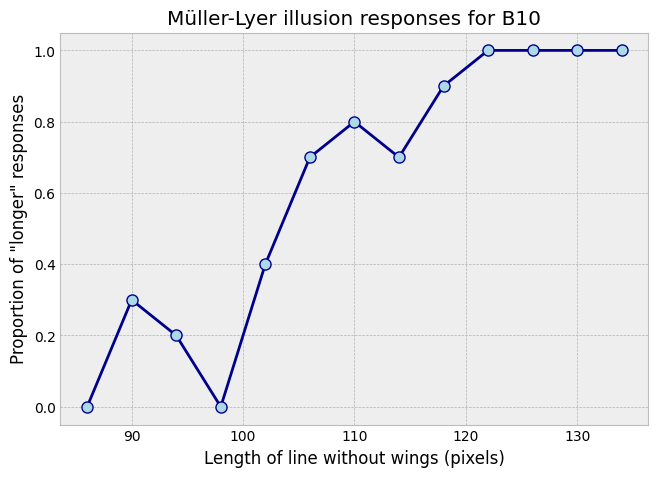

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Default settings
plt.style.use("bmh")

df_user = df[df['username'] == selected_username]
df_user = df_user.transpose().drop('username')
df_user.columns = ['proportion_longer']

plt.figure(figsize=(6, 4))
plt.plot(df_user.index.astype(int), df_user['proportion_longer'],
         marker='o',
         color='darkblue',
         markersize=8,
         linestyle='-',
         markerfacecolor='lightblue',
)
plt.xlabel('Length of line without wings (pixels)')
plt.ylabel('Proportion of "longer" responses')
plt.title(f'Müller-Lyer illusion responses for {selected_username}')
plt.show()

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: Look at the graph, and focus only on the blue line that represents your data. How is your data depicted in the graph? What is on the horizontal axis? What is on the vertical axis?
</div>

You should notice that the proportion of "longer" responses increases as the length of the line without wings increases. This is expected, as longer lines are more likely to be perceived as longer than the standard line with wings. However, this is not completely smooth for all pixel lengths. This is because perception is variable, and even for the same physical stimulus, different trials may yield different perceptions. In order to remove this variability, we can fit a psychometric function to the data.

Fitted parameters for B10:
  PSE (Point of Subjective Equality): 104.30 pixels
  Sigma (spread): 10.04 pixels


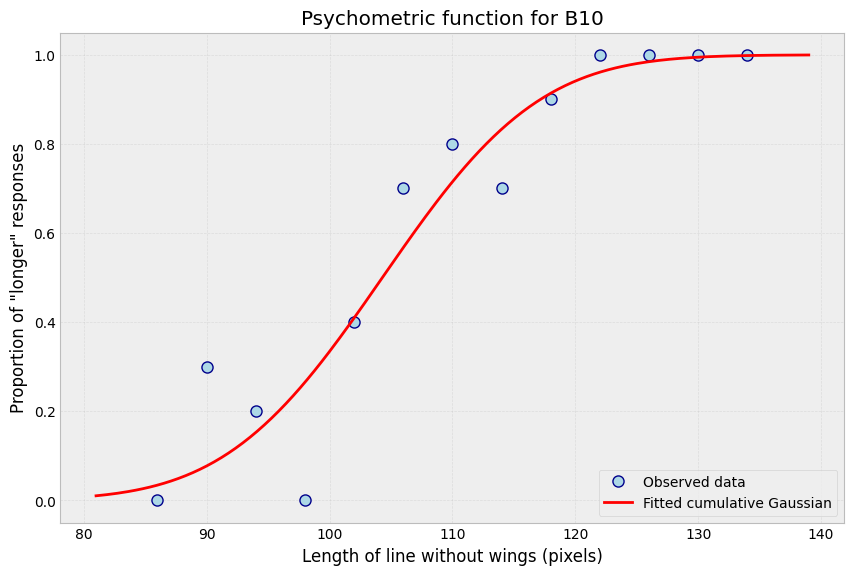

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the cumulative Gaussian function (psychometric function)
def cumulative_gaussian(x, mu, sigma):
    """
    Cumulative Gaussian function for psychometric curve fitting.

    Parameters:
    - x: stimulus intensity (line length in pixels)
    - mu: mean (Point of Subjective Equality - PSE)
    - sigma: standard deviation (related to slope/sensitivity)

    Returns:
    - Probability of "longer" response
    """
    return norm.cdf(x, loc=mu, scale=sigma)

# Prepare the data for fitting
x_data = df_user.index.astype(int).values
y_data = df_user['proportion_longer'].values

# Fit the cumulative Gaussian to the data
# Initial guesses: mu around the middle of the x range, sigma around 10
initial_guess = [np.mean(x_data), 10]

# Perform the curve fit
popt, pcov = curve_fit(cumulative_gaussian, x_data, y_data, p0=initial_guess)

# Generate smooth curve for plotting
x_smooth = np.linspace(min(x_data) - 5, max(x_data) + 5, 200)
y_fitted = cumulative_gaussian(x_smooth, mu_fit, sigma_fit)

# Plot the data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'o', color='darkblue', markersize=8,
         markerfacecolor='lightblue', label='Observed data')
plt.plot(x_smooth, y_fitted, '-', color='red', linewidth=2,
         label=f'Fitted cumulative Gaussian')

plt.xlabel('Length of line without wings (pixels)')
plt.ylabel('Proportion of "longer" responses')
plt.title(f'Psychometric function for {selected_username}')
plt.legend(loc='lower right')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.show()

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: Look at the graph, and focus only on the red line. What does this line represent? How does it relate to your data? Does the line represent your data well?
</div>

In [ ]:
# Extract fitted parameters
mu_fit, sigma_fit = popt
print(f"Fitted parameters for {selected_username}:")
print(f"  PSE (Point of Subjective Equality): {mu_fit:.2f} pixels")
print(f"  Sigma (spread): {sigma_fit:.2f} pixels")

Fitted parameters for B10:
  PSE (Point of Subjective Equality): 104.30 pixels
  Sigma (spread): 10.04 pixels


<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: The line with wings was always 100 pixels long. What would be the value for the PSE if there was no Müller-Lyer illusion?
</div>

So, what does this mean? At the PSE, the participant is equally likely to perceive the line without wings as longer or shorter than the standard line with wings. A PSE greater than 100 pixels indicates that the participant perceives the line with outward-drawn wings as longer than it actually is, demonstrating the Müller-Lyer illusion effect. The standard deviation (σ) provides insight into how consistent the participant's perceptions are; a smaller σ indicates more consistent responses across trials.

So far, we have focused on analyzing the data from a single participant. However, in a typical experiment, we would collect data from multiple participants to understand the generalizability of the findings. By fitting psychometric functions to each participant's data, we can compare the PSEs and σ values across individuals. This allows us to assess the variability in perception of the Müller-Lyer illusion among different people. Let's repeat this for all participants.

In [ ]:
results = []
for username in usernames[1:]:
    df_user = df[df['username'] == username]
    df_user = df_user.transpose().drop('username')
    df_user.columns = ['proportion_longer']

    x_data = df_user.index.astype(int).values
    y_data = df_user['proportion_longer'].values

    try:
        initial_guess = [np.mean(x_data), 10]
        popt, pcov = curve_fit(cumulative_gaussian, x_data, y_data, p0=initial_guess)

        mu_fit, sigma_fit = popt
        print(f"Fitted parameters for {username}:")
        print(f"  PSE (Point of Subjective Equality): {mu_fit:.2f} pixels")
        print(f"  Sigma (spread): {sigma_fit:.2f} pixels")
        results.append({'username': username, 'PSE': mu_fit, 'Sigma': sigma_fit})
    except:
        print(f"Could not fit data for {username}.")
        results.append({'username': username, 'PSE': np.nan, 'Sigma': np.nan})

Fitted parameters for B10:
  PSE (Point of Subjective Equality): 104.30 pixels
  Sigma (spread): 10.04 pixels
Fitted parameters for B11:
  PSE (Point of Subjective Equality): 106.21 pixels
  Sigma (spread): 8.02 pixels
Fitted parameters for B12:
  PSE (Point of Subjective Equality): 112.19 pixels
  Sigma (spread): 3.87 pixels
Fitted parameters for B13:
  PSE (Point of Subjective Equality): 115.19 pixels
  Sigma (spread): 2.27 pixels
Fitted parameters for B14:
  PSE (Point of Subjective Equality): 115.29 pixels
  Sigma (spread): 4.18 pixels
Fitted parameters for B15:
  PSE (Point of Subjective Equality): 110.43 pixels
  Sigma (spread): 2.01 pixels
Fitted parameters for B16:
  PSE (Point of Subjective Equality): 120.00 pixels
  Sigma (spread): 8.52 pixels
Fitted parameters for B18:
  PSE (Point of Subjective Equality): 105.78 pixels
  Sigma (spread): 6.84 pixels
Could not fit data for B19.
Fitted parameters for B20:
  PSE (Point of Subjective Equality): 111.29 pixels
  Sigma (spread): 4.

Let's visualise the results across all participants

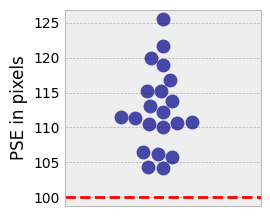

Mean PSE across participants: 112.58
Standard Deviation of PSE across participants: 5.764


In [ ]:
results_df = pd.DataFrame(results).dropna()

import seaborn as sns
sns.swarmplot(data=results_df, y='PSE', color='darkblue', size=10, alpha=0.7)
plt.axhline(100, color='red', linestyle='--', label='Actual line length (100 pixels)')
plt.ylabel('PSE in pixels')
plt.show()

print('Mean PSE across participants: %.2f' % results_df['PSE'].mean())
print('Standard Deviation of PSE across participants: %.3f' % results_df['PSE'].std())

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: Here are some questions to help with interpreting the results:
- PSE stands for point of subjective equality. What is meant by this?
- How do the PSE values compare to the actual length of the line with wings (100 pixels)?
- Did we confirm the Müller-Lyer illusion?
- Why was the step of ‘fitting a function’ the data necessary?
</div>

**Well done! Your reached the end of this notebook**


That's it for the Müller-Lyer illusion experiment! You should now have a good understanding of how to analyze psychophysical data using the method of constant stimuli and how to interpret the results in the context of perceptual illusions.